In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
no_red = pd.read_csv("/content/gdrive/MyDrive/Radius_to_Distance/no_playground_redball.csv")
no_blu = pd.read_csv("/content/gdrive/MyDrive/Radius_to_Distance/no_playground_blueball.csv")
no_gre = pd.read_csv("/content/gdrive/MyDrive/Radius_to_Distance/no_playground_greenball.csv")

red = pd.read_csv("/content/gdrive/MyDrive/Radius_to_Distance/playground_redball.csv")
blu = pd.read_csv("/content/gdrive/MyDrive/Radius_to_Distance/playground_blueball.csv")
gre = pd.read_csv("/content/gdrive/MyDrive/Radius_to_Distance/playground_green.csv")

In [ ]:
no_red["ground"] = 0
no_blu["ground"] = 0
no_gre["ground"] = 0

red["ground"] = 1
blu["ground"] = 1
gre["ground"] = 1


no_red["red"] = 1
no_blu["red"] = 0
no_gre["red"] = 0

red["red"] = 1
blu["red"] = 0
gre["red"] = 0


no_red["green"] = 0
no_blu["green"] = 0
no_gre["green"] = 1

red["green"] = 0
blu["green"] = 0
gre["green"] = 1


no_red["blu"] = 0
no_blu["blu"] = 1
no_gre["blu"] = 0

red["blu"] = 0
blu["blu"] = 1
gre["blu"] = 0

In [ ]:
import seaborn as sns
sns.set()

In [ ]:
final_data = pd.concat([red, blu, gre, no_red, no_blu, no_gre]).reset_index(drop=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3527 entries, 0 to 3526
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Radius        3527 non-null   float64
 1   IRL_Distance  3527 non-null   float64
 2   ground        3527 non-null   int64  
 3   red           3527 non-null   int64  
 4   green         3527 non-null   int64  
 5   blu           3527 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 165.5 KB


<Figure size 1500x1500 with 0 Axes>

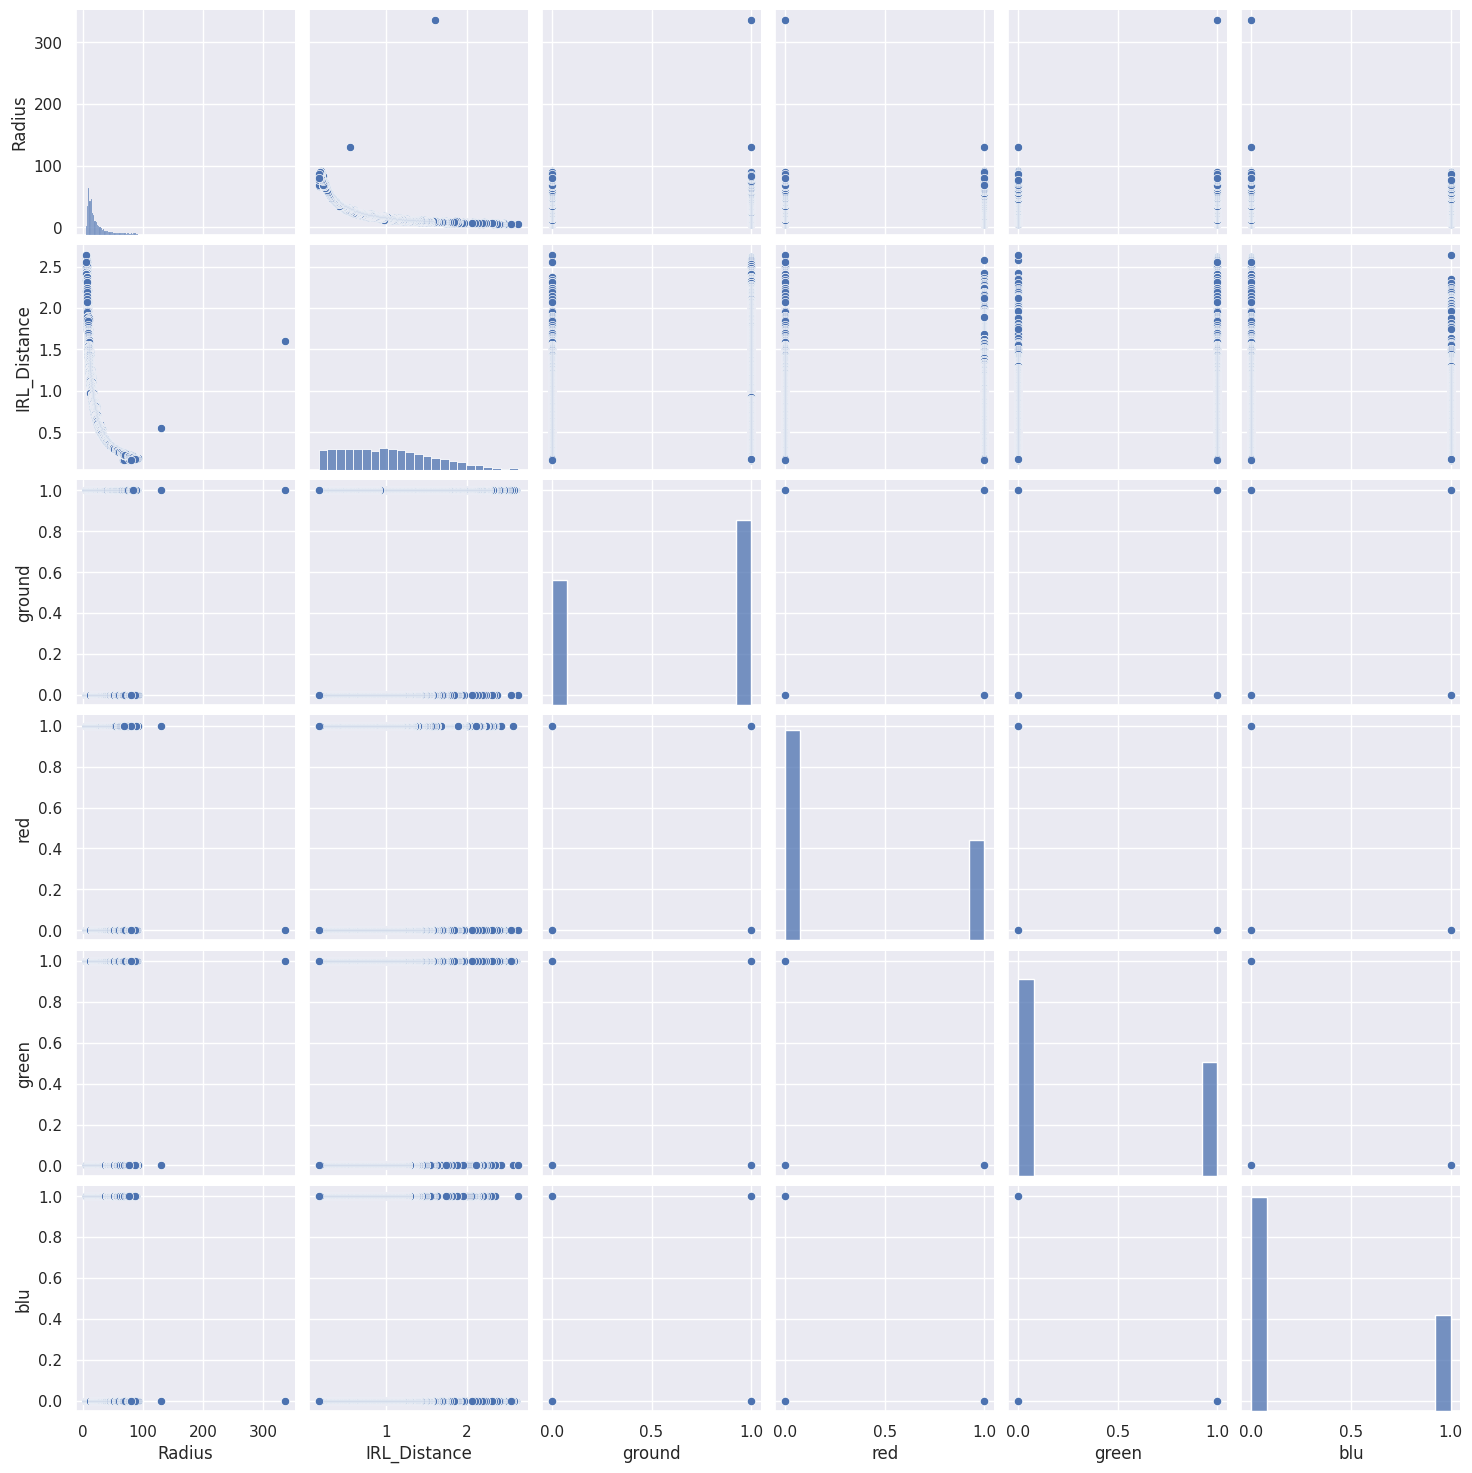

In [ ]:
plt.figure(figsize = (15, 15))
sns.pairplot(final_data)

In [ ]:
y = final_data['IRL_Distance']
x = final_data.drop(["IRL_Distance"], axis = 1)

In [ ]:
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
tweedy = TweedieRegressor(power=1, alpha=0.5, link='log')
tweedy.fit(x, y)

TweedieRegressor(alpha=0.5, link='log', power=1)

In [ ]:
y_pred = tweedy.predict(x)

In [ ]:
mean_squared_error(y, y_pred)

0.03839757178012588

In [ ]:
tweedy.coef_

array([-0.04291605,  0.03626738, -0.00650742,  0.01803898, -0.01153318])

In [ ]:
model = LinearRegression()
model.fit(x,y)
mean_squared_error(y, model.predict(x))

0.12480016361517704

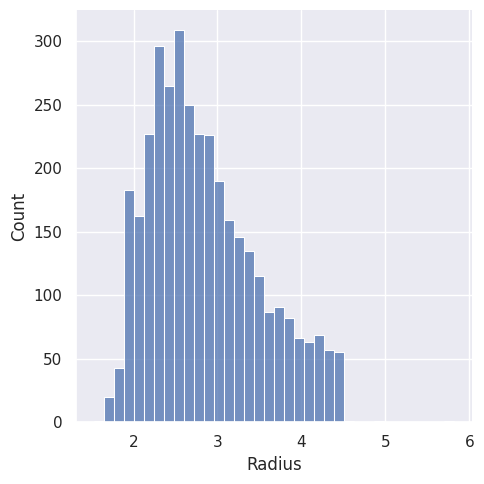

In [ ]:
sns.displot(np.log(final_data["Radius"]))

In [ ]:
x["log_rad"] = np.log(final_data["Radius"])
# pd.concat([x, np.log(final_data["Radius"])]).reset_index(drop=True)

In [ ]:
x

,Radius,ground,red,green,blu,log_rad
0,6.000000,1,1,0,0,1.791759
1,5.500000,1,1,0,0,1.704748
2,5.500000,1,1,0,0,1.704748
3,6.900000,1,1,0,0,1.931521
4,5.500000,1,1,0,0,1.704748
...,...,...,...,...,...,...
3522,87.300003,0,0,1,0,4.469350
3523,90.099998,0,0,1,0,4.500920
3524,89.000000,0,0,1,0,4.488636
3525,87.099998,0,0,1,0,4.467057


In [ ]:
tweedy2 = TweedieRegressor(power=1, alpha=0.5, link='log')
tweedy2.fit(x, y)
mean_squared_error(y, tweedy2.predict(x))

0.033965132797916825

In [ ]:
tweedy2.coef_

array([-0.03930672,  0.03416013, -0.00613621,  0.01712707, -0.01099412,
       -0.07463072])

In [ ]:
tweedy.coef_

array([-0.04291605,  0.03626738, -0.00650742,  0.01803898, -0.01153318])

In [ ]:
y.mean()

1.0278902283580562

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(2821, 6)
(706, 6)
(2821,)


In [ ]:
model2 = TweedieRegressor(power=1, alpha=0.5, link='log')
model2.fit(x_train ,y_train)
mean_squared_error(y_test, model2.predict(x_test))

0.034068737846693974

In [ ]:
((0.033965132797916825 - 0.034068737846693974) / 0.033965132797916825)*100

-0.3050335454113197

In [ ]:
col = np.array(x.columns)
col

array(['Radius', 'ground', 'red', 'green', 'blu', 'log_rad'], dtype=object)

In [ ]:
coef = tweedy2.coef_
coef

array([-0.03930672,  0.03416013, -0.00613621,  0.01712707, -0.01099412,
       -0.07463072])

In [ ]:
np.save('coef.npy', coef)
np.save('col.npy', col)

In [ ]:
from google.colab import files

In [ ]:
files.download('coef.npy')
files.download('col.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
np.save('col.npy', col)
files.download('col.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x_train

,Radius,ground,red,green,blu,log_rad
589,36.400002,1,1,0,0,3.594569
14,6.900000,1,1,0,0,1.931521
1089,18.000000,1,0,0,1,2.890372
3333,21.799999,0,0,1,0,3.081910
3430,34.900002,0,0,1,0,3.552487
...,...,...,...,...,...,...
1757,13.100000,1,0,1,0,2.572612
1188,27.900000,1,0,0,1,3.328627
774,8.800000,1,0,0,1,2.174752
557,28.799999,1,1,0,0,3.360375


In [ ]:
model3 = LinearRegression()
model3.fit(x,y)
mean_squared_error(y, model3.predict(x))

0.010666357143079763

In [ ]:
model5 = LinearRegression()
model5.fit(x_train, y_train)
mean_squared_error(y_test, model5.predict(x_test))

0.025305261073722062

In [ ]:
model4 = LinearRegression()
model4.fit(np.array(x_train["log_rad"]).reshape(-1, 1), y_train)
mean_squared_error(y_test, model4.predict(np.array(x_test["log_rad"]).reshape(-1, 1)))

0.04963269877657866

In [ ]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [ ]:
pd.concat([x, y], axis = 1)

,Radius,ground,red,green,blu,log_rad,IRL_Distance
0,6.000000,1,1,0,0,1.791759,2.581343
1,5.500000,1,1,0,0,1.704748,2.428058
2,5.500000,1,1,0,0,1.704748,2.425652
3,6.900000,1,1,0,0,1.931521,2.356427
4,5.500000,1,1,0,0,1.704748,2.336385
...,...,...,...,...,...,...,...
3522,87.300003,0,0,1,0,4.469350,0.184164
3523,90.099998,0,0,1,0,4.500920,0.181594
3524,89.000000,0,0,1,0,4.488636,0.178952
3525,87.099998,0,0,1,0,4.467057,0.176396


In [ ]:
sns.set()

formula = 'IRL_Distance ~ ' + ' + '.join(list(x.columns))
lm = smf.ols(formula=formula, data=pd.concat([x, y], axis = 1)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           IRL_Distance   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 1.932e+04
Date:                Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:53:21   Log-Likelihood:                 3002.9
No. Observations:                3527   AIC:                            -5994.
Df Residuals:                    3521   BIC:                            -5957.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2496      0.012    277.090      0.000       3.227       3.273
Radius         0.0217      0.000     89.438      0.000       0.021       0.022
ground         0.0346      0.004      9.427      0.000       0.027       0.042
red            1.0754      0.005    228.616      0.000       1.066       1.085
green          1.1033      0.004    252.680      0.000       1.095       1.112
blu            1.0709      0.005    223.133      0.000       1.062       1.080
log_rad       -1.3348      0.007   -194.103      0.000      -1.348      -1.321
==============================================================================
Omnibus:                     2514.556   Durbin-Watson:                   0.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           753665.054
Skew:                          -2.283   Prob(JB):                         0.00
Kurtosis:                      74.467   Cond. No.                     1.29e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.75e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
lm.params


Intercept    3.249630
Radius       0.021669
ground       0.034641
red          1.075408
green        1.103280
blu          1.070942
log_rad     -1.334787
dtype: float64

In [ ]:
coef

array([-0.03930672,  0.03416013, -0.00613621,  0.01712707, -0.01099412,
       -0.07463072])

In [ ]:
lm.fittedvalues

0       2.098075
1       2.203382
2       2.203382
3       1.931025
4       2.203382
          ...   
3522    0.278981
3523    0.297515
3524    0.290075
3525    0.277708
3526    0.238860
Length: 3527, dtype: float64

In [ ]:
model3.coef_

array([ 0.02166899,  0.03464074, -0.00780182,  0.02007002, -0.0122682 ,
       -1.33478727])

In [ ]:
model3.intercept_

4.332839853740579

In [ ]:
col

array(['Radius', 'ground', 'red', 'green', 'blu', 'log_rad'], dtype=object)

In [ ]:
coef = np.array([4.332839853740579, 0.02166899,  0.03464074, -0.00780182,  0.02007002, -0.0122682 ,
       -1.33478727])
col = np.array(['intercept', 'Radius', 'ground', 'red', 'green', 'blu', 'log_rad'])

In [ ]:
np.save('coef.npy', coef)
files.download('coef.npy')
np.save('col.npy', col)
files.download('col.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
lm.params['Intercept'] = 4.332839853740579
lm.params['Radius'] = 0.02166899
lm.params['ground'] = 0.03464074
lm.params['red'] = -0.00780182
lm.params['green'] = 0.02007002
lm.params['blu'] = -0.0122682
lm.params['log_rad'] = -1.33478727

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           IRL_Distance   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 1.932e+04
Date:                Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:33:10   Log-Likelihood:                 3002.9
No. Observations:                3527   AIC:                            -5994.
Df Residuals:                    3521   BIC:                            -5957.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3328      0.012    277.090      0.000       4.310       4.356
Radius         0.0217      0.000     89.438      0.000       0.021       0.022
ground         0.0346      0.004      9.427      0.000       0.027       0.042
red           -0.0078      0.005    228.616      0.000      -0.017       0.001
green          0.0201      0.004    252.680      0.000       0.012       0.029
blu           -0.0123      0.005    223.133      0.000      -0.022      -0.003
log_rad       -1.3348      0.007   -194.103      0.000      -1.348      -1.321
==============================================================================
Omnibus:                     2514.556   Durbin-Watson:                   0.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           753665.054
Skew:                          -2.283   Prob(JB):                         0.00
Kurtosis:                      74.467   Cond. No.                     1.29e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.75e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
coef / lm.bse

Intercept    369.453841
Radius        89.437853
ground         9.426543
red           -1.658551
green          4.596553
blu           -2.556105
log_rad     -194.102935
dtype: float64

In [ ]:
coef

array([ 4.33283985,  0.02166899,  0.03464074, -0.00780182,  0.02007002,
       -0.0122682 , -1.33478727])

In [ ]:
lm.bse

Intercept    0.011728
Radius       0.000242
ground       0.003675
red          0.004704
green        0.004366
blu          0.004800
log_rad      0.006877
dtype: float64

In [ ]:
4.33283985/0.011728

369.44405269440654

In [ ]:
import scipy.stats as stats

n = len(x) # number of observations
df = n - coef.shape[0] # degrees of freedom
t_values = coef / lm.bse # calculate t-values
p_values = 2 * (1 - stats.t.cdf(abs(t_values), df)) # calculate two-tailed p-values


In [ ]:
p_values

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.72953182e-02,
       4.44624392e-06, 1.06267608e-02, 0.00000000e+00])

In [ ]:
col

array(['intercept', 'Radius', 'ground', 'red', 'green', 'blu', 'log_rad'],
      dtype='<U9')